In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics
#from scipy import special
import scipy.optimize as so

In [3]:
from functions import *

In [4]:
#PARAMETERS
#________________________________________________________
dx=8.8#cm
#dx=1
dX=0.1
limx=100
XX=np.arange(0,limx,dX)
xx=np.arange(0,limx,dx)

    #domaine temporel  (en h)
limt=100
dt=1
tt=np.arange(0,limt,dt)

#variables 
s=5  #standard dev   gaussian
mu=50   #moyenne gaussienne 
K=0.1

C:\Users\brune\anaconda3\envs\sigtest\lib\site-packages\scipy\stats\_distn_infrastructure.py:2085: RuntimeWarning: divide by zero encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
C:\Users\brune\anaconda3\envs\sigtest\lib\site-packages\scipy\stats\_distn_infrastructure.py:2085: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


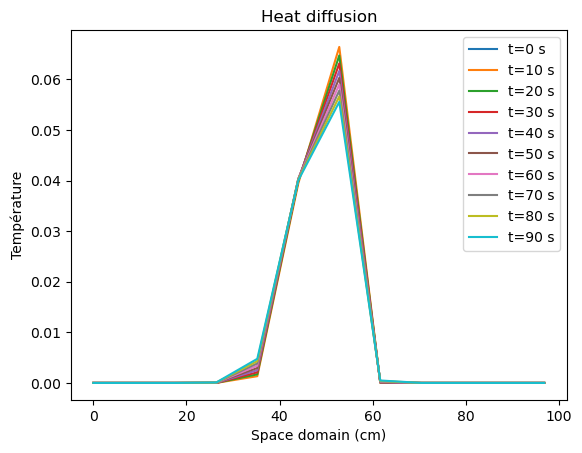

In [88]:
Ta=analytical_solution(dx,limx,dt,limt,K,plot=1)



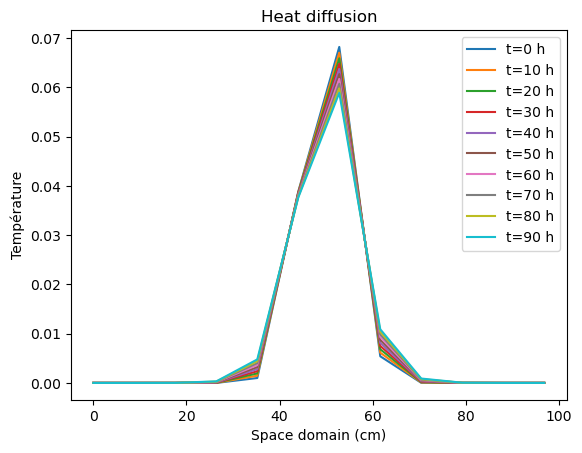

In [89]:
Tf=euler_f(dx,limx,dt,limt,K ,plot=1)

#STABILITY ANALYSIS  K dt /dx²   < 0.5    

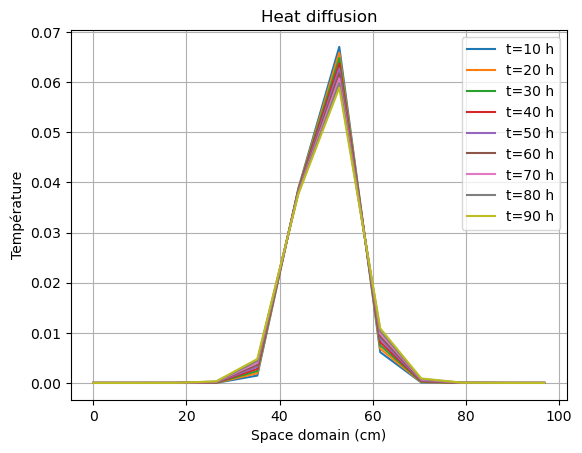

In [90]:
Tb=euler_b(dx,limx,dt,limt,K,plot=1)


In [91]:

Td=Dufort_Frankel(dx,limx,dt,limt,Tf,K)

In [23]:
def LeftOp(X,dx,dt,K):
    theta =0.5
    A = K*dt*theta/(dx**2)
    thA = theta*A
    Z = -thA*np.roll(X,1) -thA*np.roll(X,-1) + (1+2*thA)*X
    return Z

def RightOp(X,dx,dt,K):
    theta =0.5
    A = K*dt*theta/(dx**2)
    thA = theta*A
    Z = (A-thA)*np.roll(X,1) + (A-thA)*np.roll(X,-1) + (1-2*A+2*thA)*X
    return Z

def CostFunc_CN(X, b,dx,dt,K):
    return 0.5*np.dot(X,LeftOp(X,dx,dt,K)) - np.dot(X,b)

def CostGrad_CN(X, b,dx,dt,K):
    return LeftOp(X,dx,dt,K) - b


def Crank_Nicolson(dx,limx,dt,limt,K,plot=0):
    xx=np.arange(0,limx,dx)
    tt=np.arange(0,limt,dt)
    Tc=np.zeros((len(tt),len(xx)))
    mu=50
    s=5
    Tc[0,:]=gauss(xx, mu, s)
    #Conditions aux limites 
    Tc[:,0]=np.zeros(len(tt))
    #Td[:,1]=np.zeros(len(tt))
    Tc[:,-1]=np.zeros(len(tt))
    
    
    theta =0.5
    A = K*dt*theta/(dx**2)
    thA = theta*A

    for i in range(1,len(tt)):
        b = RightOp(Tc[i-1,:],dx,dt,K)
        Xopt = Tc[i-1,:]
    
        res = so.minimize(CostFunc_CN, Xopt, args=(b,dx,dt,K),
                          method='L-BFGS-B',
                          jac=CostGrad_CN,
                          options={'maxiter': 20})
        Tc[i,:] = res['x']
        if plot==1:
            if i%10==0:
                plt.plot(xx,Tc[i,:],label='t='+str(i)+' h')
                plt.legend()
                plt.xlabel('Space domain (cm)')
                plt.ylabel('Température')
                plt.grid()
                plt.title('Heat diffusion')
                
                
            #plt.plot(xx,Tc[0,:],'k-')
    return Tc


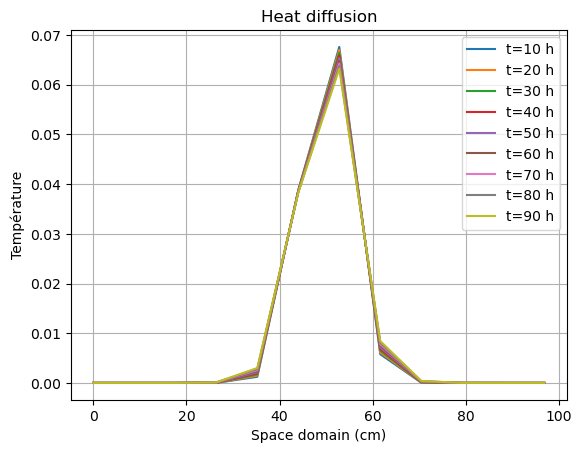

In [92]:
Tc=Crank_Nicolson(dx,limx,dt,limt,K,plot=1)

In [ ]:
dxlist=np.arange(0.1,1)  
RMSEt=np.zeros(len(tt))


for l in range(len(dxlist)):
    dxtest=dxlist[l]
    f=euler_f(dxtest)
    a=analytical_solution(dxtest)
    for i in range (0,len(tt)):
        RMSEt[i]=RMSE(a[i,:],f[i,:])
  
    plt.plot(tt,RMSEt,label='dt='+str(dxtest))
#lt.legend()
plt.xlabel('Time scale (s)')
plt.ylabel('RMSE')
plt.grid()
#RMSEt

In [46]:
Tc=Crank_Nicolson(dx,limx,dt,limt,K)
Ta=analytical_solution(dx,limx,dt,limt,K)
Tf=euler_f(dx,limx,dt,limt,K)
Tb=euler_b(dx,limx,dt,limt,K)
Td=Dufort_Frankel(dx,limx,dt,limt,Tf,K)


C:\Users\brune\anaconda3\envs\sigtest\lib\site-packages\scipy\stats\_distn_infrastructure.py:2085: RuntimeWarning: divide by zero encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
C:\Users\brune\anaconda3\envs\sigtest\lib\site-packages\scipy\stats\_distn_infrastructure.py:2085: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


0.2549756717470319


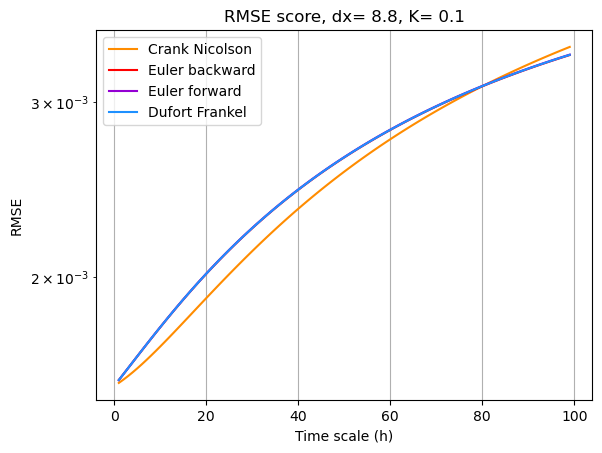

In [93]:
RMSEt=np.zeros(len(tt))
RMSEd=np.zeros(len(tt))
RMSEc=np.zeros(len(tt))
RMSEb=np.zeros(len(tt))
for i in range (0,len(tt)):
    RMSEt[i]=RMSE(Ta[i,:],Tf[i,:])
    sumRMSE=+RMSEt[i]
    RMSEd[i]=RMSE(Ta[i,:],Td[i,:])
    RMSEb[i]=RMSE(Ta[i,:],Tb[i,:])
    RMSEc[i]=RMSE(Ta[i,:],Tc[i,:])
    

print(np.nansum(RMSEt))
plt.semilogy(tt,RMSEc,label='Crank Nicolson',color='darkorange')
plt.plot(tt,RMSEb,label='Euler backward',color='red')
plt.plot(tt,RMSEt,label='Euler forward',color='darkviolet')
plt.plot(tt,RMSEd,label='Dufort Frankel',color='dodgerblue')


plt.legend()
plt.xlabel('Time scale (h)')
plt.ylabel('RMSE')
plt.title('RMSE score, dx= '+str(dx)+', K= '+str(K))
plt.grid()
#RMSEt


In [20]:

#PARAMETERS
#________________________________________________________
dxlist=[0.2,0.4,0.8,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8,8.8,9,9.5,10,10.5,11,11.5,12]#dxlist=np.arange(0.2,15,0.2)
#dx=1
dX=0.1

dt=1
limt=100
tt=np.arange(0,limt,dt)
    #domaine temporel  (en s)
s=5  #standard dev   gaussian
mu=50   #moyenne gaussienne 
K=0.1  
RMSEbb=np.zeros(len(dxlist))
RMSEff=np.zeros(len(dxlist)-2)
RMSEcc=np.zeros(len(dxlist))
RMSEdd=np.zeros(len(dxlist))
for l in range(len(dxlist)):
    dx=dxlist[l]
    
    Ta=analytical_solution(dx,limx,dt,limt,K)
    
      
    Tb=euler_b(dx,limx,dt,limt,K)
    RMSEb=np.zeros(len(tt))
    
    Td=Dufort_Frankel(dx,limx,dt,limt,Tb,K)
    RMSEd=np.zeros(len(tt))
    
    Tc=Crank_Nicolson(dx,limx,dt,limt,K)
    RMSEc=np.zeros(len(tt))
    
    
    for i in range (0,len(tt)):
        RMSEd[i]=RMSE(Ta[i,:],Td[i,:])
        RMSEb[i]=RMSE(Ta[i,:],Tb[i,:])
        RMSEc[i]=RMSE(Ta[i,:],Tc[i,:])
    
    
    RMSEbb[l]=np.nansum(RMSEb)
    RMSEdd[l]=np.nansum(RMSEd)
    RMSEcc[l]=np.nansum(RMSEc)
    
    if dx >0.5:
        RMSEf=np.zeros(len(tt))
        Tf=euler_f(dx,limx,dt,limt,K)
        for i in range (0,len(tt)):
            RMSEf[i]=RMSE(Ta[i,:],Tf[i,:])
        RMSEff.append(np.nansum(RMSEf))
        
        

#print(ubis[0,:])    

AttributeError: 'numpy.ndarray' object has no attribute 'append'

In [ ]:
plt.plot(dxlist[2:len(dxlist)],RMSEff,color='k',linestyle='--',marker='+')
plt.plot(dxlist,RMSEdd,color='r',linestyle='--',marker='+')
plt.plot(dxlist,RMSEbb,color='b',linestyle='--',marker='+')
plt.plot(dxlist,RMSEcc,color='g',linestyle='--',marker='+')
    
plt.xlabel('Time step dt (s)')
plt.ylabel('RMSE')
    #plt.legend()
plt.grid()
            

plt.show()